In [1]:
import glob
import pandas as pd
import re
from Bio import Entrez
import time
import xml.etree.ElementTree as ET
import seaborn as sns
import copy

In [2]:
files_aml = glob.glob('aml_results/*hitcount.txt')
files_control = glob.glob('control_results/*hitcount.txt')

In [3]:
sequences = ['NM_001329964.1',
 'NM_003722.4',
 'NM_001329150.1',
 'NM_001329149.1',
 'NM_001329148.1',
 'NM_001329146.1',
 'NM_001329145.1',
 'NM_001329144.1',
 'NM_001114981.1',
 'NM_001114980.1',
 'NM_001114978.1',
 'AK123566.1',
 'NM_001319041.1',
 'NM_001446.4',
 'NM_001319042.1',
 'NM_015852.3',
 'NM_001348050.1',
 'NM_152473.2',
 'NM_003032.2',
 'AF134163.1',
 'NM_032622.2',
 'NM_001126328.2',
 'AK074464.1',
 'NM_017986.3',
 'NM_001104577.1',
 'EU669866.1',
 'EF535613.1',
 'NM_024534.5',
 'NM_001242690.1',
 'NM_001007253.3',
 'U37263.1',
 'U37251.1',
 'AB266802.1',
 'AB128832.1',
 'M64936.1',
 'AF097027.1',
 'AF072502.1',
 'NM_002825.6',
 'NM_001321387.2',
 'NM_001321386.2',
 'XM_011513341.3',
 'NM_032793.4',
 'NM_001287809.1',
 'NM_001287808.1',
 'NM_001136493.2',
 'AJ431196.1',
 'AF072508.1',
 'NM_001319039.1',
 'XM_011528468.3',
 'NM_001130925.1',
 'AF072506.2',
 'NM_016255.2',
 'NM_004929.3',
 'M74509.1',
 'EF194101.1',
 'AB062074.1',
 'X57147.1',
 'M85205.1',
 'JF262036.1',
 'AB062072.1',
 'XM_017012936.1',
 'XM_011512293.1',
 'XM_011512292.1',
 'M11119.1',
 'AB062076.1',
 'M27826.1',
 'KF254380.1',
 'EU195221.1',
 'EU195220.1',
 'EF535612.1',
 'AF133658.1',
 'AF110315.1',
 'AB062078.1',
 'U88896.1',
 'U88895.1',
 'NM_207582.2',
 'NM_001308491.1',
 'M27828.1',
 'KF254354.1',
 'KF254344.1',
 'AY395526.1',
 'AY395521.1',
 'AF179225.1',
 'AF134164.1',
 'AF072501.1',
 'AB062077.1',
 'AB062073.1',
 'AB052573.1',
 'AB052569.1',
 'NM_001114982.1',
 'NM_001114979.1',
 'NM_001349821.1',
 'NM_001349823.1',
 'NM_001349822.1',
 'AB062075.1',
 'KF254387.1',
 'XM_017017016.1',
 'XM_017007620.2',
 'AF072504.1',
 'KF254392.1',
 'XM_024453864.1',
 'XM_017007614.2',
 'AB052568.1',
 'XM_024453865.1',
 'XM_017007612.2',
 'KF254353.1',
 'AB052576.1',
 'AF072499.1',
 'XM_024453866.1',
 'XM_017007613.2',
 'AF080231.1',
 'EU195219.1',
 'AB052567.1',
 'KF254359.1',
 'NM_014590.3',
 'AF080234.1',
 'KF254357.1',
 'AB052575.1',
 'EU195218.1',
 'AF080232.1',
 'XM_017027549.1',
 'AF080230.1',
 'AK124077.1',
 'AF072500.1',
 'EU791617.1',
 'AK124340.1',
 'AF080229.1',
 'U71456.1',
 'AF080233.1',
 'KF254365.1',
 'AF072505.1',
 'AY541704.1',
 'AF072507.1',
 'AY371035.1',
 'KF254360.1',
 'AF072503.1',
 'KF254386.1',
 'KF254383.1',
 'KF254343.1',
 'AY208136.1',
 'KF254391.1',
 'KF254379.1',
 'AY098482.1',
 'KF254382.1',
 'AF159093.1',
 'KF254384.1',
 'KF254340.1',
 'AY920281.1',
 'AY920280.1',
 'AB052570.1',
 'XM_011528461.2',
 'NM_024531.4',
 'KF254358.1',
 'NM_001253816.1',
 'NM_001253815.1',
 'AF026246.1',
 'KF254385.1',
 'KF254372.1',
 'KF254368.1',
 'AF026247.1',
 'XM_011528469.2',
 'U87590.1',
 'NM_032498.2',
 'KF254367.1',
 'KF254361.1',
 'U87591.1',
 'AB052571.1',
 'AY208135.1',
 'S46006.1',
 'KF254363.1',
 'AY208134.1',
 'U87594.1',
 'KF254366.1',
 'KF254341.1',
 'KF254339.1',
 'KF254370.1',
 'KF254374.1',
 'KF254373.1',
 'KF254350.1',
 'KF254377.1',
 'KF254376.1',
 'KF254375.1',
 'KF254371.1',
 'KF254369.1',
 'KF254364.1',
 'AY208133.1',
 'AB063621.1',
 'AB052572.1',
 'NM_001145095.1',
 'AB052574.1',
 'KF254389.1',
 'KF254388.1',
 'KF254381.1',
 'KF254342.1',
 'KF254338.1',
 'KF254337.1',
 'KF254336.1',
 'KF254335.1',
 'KF254334.1',
 'KF254390.1',
 'AY371046.1',
 'AY208132.1',
 'NM_000625.4',
 'KF254356.1',
 'XM_011531085.2',
 'AY070774.1',
 'AK303822.1',
 'AB063618.1',
 'U62098.1',
 'KF254355.1',
 'KF254345.1',
 'AY395522.1',
 'AY395518.1',
 'U87596.1',
 'NM_001080399.2',
 'FN689795.1',
 'AY920279.1',
 'AY920278.1',
 'KF254352.1',
 'KF254351.1',
 'AB063619.1',
 'NM_001191055.1',
 'KF254347.1',
 'KF254346.1',
 'AY371037.1',
 'AY070775.1',
 'AB063620.1',
 'U87589.1',
 'NM_014383.2',
 'KF254378.1',
 'KF254348.1',
 'AY395525.1',
 'AY395523.1',
 'AY395519.1',
 'AY371031.1',
 'JF262037.1',
 'NM_001316902.1',
 'NM_001316903.1',
 'AF072495.1',
 'AY541703.1',
 'AB096026.1',
 'AB096022.1',
 'AF239665.1',
 'AY395524.1',
 'U87595.1',
 'AB096021.1',
 'KF254349.1',
 'AB096027.1',
 'AB096025.1',
 'AB096023.1',
 'DQ179113.1',
 'U87587.1',
 'AB096024.1',
 'KF254362.1',
 'AF109183.1',
 'AF159094.1',
 'AF159095.1',
 'U87593.1',
 'U87592.1',
 'AY395520.1',
 'AY395517.1',
 'AY371045.1',
 'AY371043.1',
 'AY371042.1',
 'AY371041.1',
 'AY371040.1',
 'AY371039.1',
 'AY371038.1',
 'AY371036.1',
 'AY371034.1',
 'AY371033.1',
 'AY371032.1',
 'AY371030.1',
 'AY371029.1',
 'AY371044.1']

In [4]:
master_list = []

for file in files_aml:
    
    list_of_seqs = copy.deepcopy(sequences)
    
    name = str(file)
    
    with open(file, "r") as ifile:
        
        for line in ifile:
            
            data = line.strip().split(' ')
            data = data+[name, 'aml']
            
            list_of_seqs.remove(data[1])
            
            
            master_list.append(data)
            
    for seq in list_of_seqs:
        
        data = [0, seq, name, 'aml']
        
        master_list.append(data)

In [5]:
for file in files_control:
    
    name = str(file)
    
    list_of_seqs = copy.deepcopy(sequences)
    
    with open(file, "r") as ifile:
        
        for line in ifile:
            
            data = line.strip().split(' ')
            data = data+[name, 'control']
            master_list.append(data)
            
            
    for seq in list_of_seqs:
        
        data = [0, seq, name, 'control']
        
        master_list.append(data)

In [6]:
df = pd.DataFrame(columns=['count', 'seq', 'file', 'type'], data= master_list)

In [12]:
def get_srr_accession(df):
    """
    Extract the SRR number from the file_location field of the dataframe.
    """
    pattern = re.compile(r"[SE]RR[0-9]+")

    file = df['file']

    return re.search(pattern, file).group(0)

In [13]:
df['acc'] = df.apply(get_srr_accession, axis=1)

In [14]:
df['count'] = df['count'].astype(int)

In [15]:
pivoted_data = df.pivot_table(index='file',columns='seq', values='count')

In [16]:
pivoted_data.head()

seq,AB052567.1,AB052568.1,AB052569.1,AB052570.1,AB052571.1,AB052572.1,AB052573.1,AB052574.1,AB052575.1,AB052576.1,...,XM_017007612.2,XM_017007613.2,XM_017007614.2,XM_017007620.2,XM_017012936.1,XM_017017016.1,XM_017027549.1,XM_024453864.1,XM_024453865.1,XM_024453866.1
file,,,,,,,,,,,,,,,,,,,,,
aml_results/aml.SRR1036002.sam.hitcount.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aml_results/aml.SRR1036003.sam.hitcount.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aml_results/aml.SRR1036004.sam.hitcount.txt,0.0,4.0,5.0,0.0,2.0,2.0,5.0,0.0,0.0,2.0,...,4.0,2.0,4.0,0.0,38.0,8.0,0.0,4.0,4.0,2.0
aml_results/aml.SRR1036005.sam.hitcount.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aml_results/aml.SRR1036006.sam.hitcount.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def get_spot_count(df, email, max_errors):
    """
    Use the Entrez API to get the spot (read) count for that SRR number.
    """

    srr_acc = df['acc']
    
    print (srr_acc)

    # get SRR id
    Entrez.email = email

    error_count =0

    while error_count < max_errors:

        try:

            handle = Entrez.esearch(db="sra",term=srr_acc)

            record = Entrez.read(handle)

            handle.close()

            srr_id = record["IdList"][0]

            break

        except:

            print ('error occured collecting ID ', srr_acc, error_count)

            time.sleep(10)

            error_count = error_count +1


    # get SRR summary

    error_count =0

    while error_count < max_errors:

        try:

            handle = Entrez.esummary(db='sra', id=srr_id)

            record = Entrez.read(handle)

            handle.close()

            my_xml = record[0]['Runs']

            # Parse XML
            xml_object = ET.fromstringlist(["<root>", my_xml, "</root>"])

            # Get total_spots (reads)
            for child in xml_object:

                if child.attrib['acc'] == srr_acc:

                    print (srr_acc, child.attrib['total_spots'])

                    return int(child.attrib['total_spots'])

        except:

            print ('error occured collecting spot count', srr_acc, error_count)

            time.sleep(10)

            error_count = error_count +1

In [18]:
data2 = my_list = list(df['acc'].unique())

spot_df = pd.DataFrame(data2, columns=['acc'])

In [19]:
spot_df['spot_count'] = spot_df.apply(get_spot_count, axis=1, args=['halsteadjs@nih.gov', 3])

#spot_df = pd.read_csv('spot_counts')

SRR948635
SRR948635 17042498
SRR1918571
SRR1918571 44266215
SRR1918402
SRR1918402 51101821
SRR1608814
SRR1608814 15975638
SRR330946
SRR330946 16565451
SRR1036135
SRR1036135 14088503
SRR1918747
SRR1918747 53223279
SRR1608497
SRR1608497 27645411
SRR949093
SRR949093 47816308
SRR1036144
SRR1036144 15216638
SRR1036064
SRR1036064 12825935
SRR1918381
SRR1918381 44003605
SRR413267
SRR413267 963
SRR1918523
SRR1918523 46952954
SRR1918312
SRR1918312 57469502
SRR1918496
SRR1918496 47059760
SRR1036119
SRR1036119 27582286
SRR1608704
SRR1608704 31116127
SRR1916307
SRR1916307 19579055
SRR1608623
SRR1608623 177431890
SRR1918631
SRR1918631 59694950
SRR1608688
SRR1608688 31430364
SRR1918670
SRR1918670 43420928
SRR620044
SRR620044 14344933
SRR1663240
SRR1663240 34606929
SRR1608526
SRR1608526 32054730
SRR1608886
SRR1608886 15732680
SRR1036092
SRR1036092 24937219
SRR1918361
SRR1918361 45153857
SRR949108
SRR949108 66220949
SRR1608603
SRR1608603 10383601
SRR1608601
SRR1608601 8508298
SRR1918720
SRR1918720 823

SRR1036107 25091462
SRR948704
SRR948704 22196942
SRR1036117
SRR1036117 19351473
SRR1036078
SRR1036078 13789324
SRR1608542
SRR1608542 27508564
SRR1608676
SRR1608676 11286814
SRR1608595
SRR1608595 6238243
SRR1918701
SRR1918701 49457219
SRR1608775
SRR1608775 28808770
SRR1608891
SRR1608891 15180683
SRR948640
SRR948640 14564148
SRR1663253
SRR1663253 41631437
SRR1036096
SRR1036096 15441590
SRR1918735
SRR1918735 44950622
SRR1608719
SRR1608719 26984751
SRR1608895
SRR1608895 16231835
SRR1036054
SRR1036054 30830930
SRR1918492
SRR1918492 56854127
SRR1608681
SRR1608681 8946815
SRR1608829
SRR1608829 16144724
SRR949120
SRR949120 76814855
SRR1608862
SRR1608862 16023063
SRR1918507
SRR1918507 54362668
SRR1608763
SRR1608763 15660052
SRR1608657
SRR1608657 8892762
SRR1608529
SRR1608529 32934448
SRR1918603
SRR1918603 52407890
SRR620040
SRR620040 25627893
SRR948695
SRR948695 17530860
SRR1608748
SRR1608748 14473709
SRR1918608
SRR1918608 49654558
SRR948647
SRR948647 16776340
SRR948663
SRR948663 16761367
SRR16

SRR1608520 33189936
SRR1608680
SRR1608680 34083774
SRR948615
SRR948615 17439267
SRR1608646
SRR1608646 36035094
SRR1036099
SRR1036099 25823125
SRR1918541
SRR1918541 42983579
SRR1608627
SRR1608627 22426802
SRR1918647
SRR1918647 58236253
SRR1918465
SRR1918465 46444844
SRR1036121
SRR1036121 15163182
SRR1145839
SRR1145839 38307177
SRR948606
SRR948606 13262461
SRR1918637
SRR1918637 60093421
SRR1608746
SRR1608746 7282984
SRR1608565
SRR1608565 17993979
SRR948654
SRR948654 14070960
SRR1608909
SRR1608909 16566514
SRR1916337
SRR1916337 41390466
SRR948678
SRR948678 17355368
SRR1104902
SRR1104902 114789402
SRR1036124
SRR1036124 21230890
SRR1608807
SRR1608807 15729126
SRR1918464
SRR1918464 48833279
SRR1918474
SRR1918474 54796958
SRR1608710
SRR1608710 27436536
SRR1608731
SRR1608731 16893538
SRR1608764
SRR1608764 9232927
SRR949095
SRR949095 103262208
SRR1608665
SRR1608665 9474292
SRR1608712
SRR1608712 29782460
SRR1918389
SRR1918389 46062096
SRR1608586
SRR1608586 21065178
SRR1608890
SRR1608890 15414368

SRR1608915 14215039
SRR1916332
SRR1916332 19019176
SRR1918512
SRR1918512 51232161
SRR1608800
SRR1608800 15206231
SRR1036106
SRR1036106 24679883
SRR1918432
SRR1918432 53795293
SRR1608769
SRR1608769 14858846
SRR1608632
SRR1608632 28273417
SRR1608600
SRR1608600 8809603
SRR620096
SRR620096 16945739
SRR1918444
SRR1918444 49843238
SRR1608572
SRR1608572 5557203
SRR330938
SRR330938 9742560
SRR1916286
SRR1916286 40118878
SRR1608659
SRR1608659 9648563
SRR1036027
SRR1036027 11647770
SRR1036091
SRR1036091 24535960
SRR1036053
SRR1036053 20262041
SRR948603
SRR948603 16042018
SRR1036023
SRR1036023 11833447
SRR1918630
SRR1918630 51285077
SRR1036080
SRR1036080 14531837
SRR1608557
SRR1608557 28518606
SRR1918355
SRR1918355 50443499
SRR1608820
SRR1608820 44541313
SRR1036038
SRR1036038 14425907
SRR1918438
SRR1918438 54355586
SRR1918662
SRR1918662 48166307
SRR1918587
SRR1918587 45397298
SRR948688
SRR948688 20754451
SRR620041
SRR620041 30682079
SRR1916278
SRR1916278 44458065
SRR1918479
SRR1918479 50833164
SR

SRR1918353 54586878
SRR949097
SRR949097 136464071
SRR1608709
SRR1608709 25402951
SRR1916331
SRR1916331 19075771
SRR1663280
SRR1663280 41544901
SRR1918320
SRR1918320 49342615
SRR1608592
SRR1608592 18661694
SRR1663225
SRR1663225 20467854
SRR1918691
SRR1918691 46855571
SRR1608716
SRR1608716 23827330
SRR1036067
SRR1036067 14216466
SRR948600
SRR948600 13989478
SRR1663261
SRR1663261 31297466
SRR1608868
SRR1608868 15658096
SRR330930
SRR330930 12658136
SRR1608827
SRR1608827 15561846
SRR948689
SRR948689 22537946
SRR1608551
SRR1608551 20633105
SRR1608507
SRR1608507 27672019
SRR1916289
SRR1916289 19860401
SRR1918336
SRR1918336 47206494
SRR1608691
SRR1608691 10132743
SRR948711
SRR948711 18596108
SRR1608605
SRR1608605 9370698
SRR1918704
SRR1918704 59736595
SRR1663224
SRR1663224 47319543
SRR1918744
SRR1918744 47154830
SRR1918716
SRR1918716 49487972
SRR1918593
SRR1918593 53348495
SRR1916290
SRR1916290 19576248
SRR1918377
SRR1918377 49938860
SRR330933
SRR330933 13257789
SRR1608726
SRR1608726 27244568


SRR1036141 13724721
SRR949089
SRR949089 78741279
SRR1918713
SRR1918713 49809708
SRR1036088
SRR1036088 23569935
SRR1663245
SRR1663245 46143203
SRR1918619
SRR1918619 50941247
SRR1918610
SRR1918610 51049377
SRR1036035
SRR1036035 14200848
SRR620126
SRR620126 14804873
SRR1608578
SRR1608578 15536175
SRR1036098
SRR1036098 13568671
SRR1663209
SRR1663209 14605626
SRR330939
SRR330939 12633422
SRR1608650
SRR1608650 11332393
SRR1608555
SRR1608555 28740685
SRR1918436
SRR1918436 43723509
SRR1918653
SRR1918653 52986698
SRR1608834
SRR1608834 15626129
SRR1608727
SRR1608727 27548509
SRR1608671
SRR1608671 26306874
SRR1608713
SRR1608713 38595735
SRR1608640
SRR1608640 24772929
SRR1608789
SRR1608789 15475866
SRR620140
SRR620140 14696896
SRR1608875
SRR1608875 14430956
SRR1918314
SRR1918314 41221679
SRR1918581
SRR1918581 41393178
SRR949124
SRR949124 57921627
SRR1036041
SRR1036041 67789336
SRR1608547
SRR1608547 30042846
SRR949094
SRR949094 119016148
SRR1608921
SRR1608921 47927640
SRR1918570
SRR1918570 53026482

ERR187776 16377805
ERR204965
ERR204965 21184621
ERR187869
ERR187869 15249324
ERR188419
ERR188419 36881883
ERR011380
ERR011380 19265234
ERR187529
ERR187529 4431279
ERR204848
ERR204848 15090822
ERR187708
ERR187708 14609566
ERR204923
ERR204923 21512052
ERR188140
ERR188140 78619701
ERR188072
ERR188072 32298325
ERR188384
ERR188384 36437812
ERR204911
ERR204911 11816694
ERR187795
ERR187795 31184541
ERR187905
ERR187905 5462025
ERR187818
ERR187818 16338504
ERR188473
ERR188473 26707482
ERR188172
ERR188172 26618070
ERR188402
ERR188402 23282559
ERR204954
ERR204954 19301032
ERR187549
ERR187549 2965299
ERR187654
ERR187654 4506595
ERR188259
ERR188259 31961156
ERR188102
ERR188102 33800613
ERR188466
ERR188466 25138661
ERR188176
ERR188176 26453299
ERR188366
ERR188366 22080657
ERR188248
ERR188248 29209695
ERR204843
ERR204843 30723733
ERR188240
ERR188240 24071820
ERR187823
ERR187823 26561164
ERR188130
ERR188130 29142709
ERR188264
ERR188264 31956621
ERR188209
ERR188209 28991685
ERR187829
ERR187829 16107370

ERR204841 19781233
ERR187528
ERR187528 25276646
ERR187593
ERR187593 6576776
ERR187580
ERR187580 6401131
ERR187745
ERR187745 7130323
ERR204974
ERR204974 16791616
ERR187884
ERR187884 17310686
ERR188042
ERR188042 25650535
ERR187888
ERR187888 7005301
ERR188458
ERR188458 29493688
ERR011455
ERR011455 13622949
ERR187737
ERR187737 5274673
ERR187779
ERR187779 9722937
ERR187825
ERR187825 12567527
ERR188329
ERR188329 37938491
ERR204850
ERR204850 18810361
ERR187502
ERR187502 10855685
ERR188449
ERR188449 32158178
ERR188349
ERR188349 32765116
ERR204889
ERR204889 16264830
ERR204958
ERR204958 14741820
ERR187548
ERR187548 4544034
ERR187511
ERR187511 38825922
ERR188460
ERR188460 35770368
ERR205019
ERR205019 14469446
ERR188046
ERR188046 30901407
ERR187685
ERR187685 5935216
ERR187747
ERR187747 8231234
ERR187657
ERR187657 19804398
ERR187667
ERR187667 12972693
ERR187831
ERR187831 4766635
ERR188267
ERR188267 34490702
ERR187721
ERR187721 14754560
ERR187597
ERR187597 11954361
ERR187858
ERR187858 7976429
ERR188

ERR188409 31415733
ERR188381
ERR188381 21422394
ERR011381
ERR011381 16991870
ERR187526
ERR187526 7300568
ERR188263
ERR188263 31951537
ERR187734
ERR187734 13007350
ERR187755
ERR187755 8917798
ERR187547
ERR187547 17346393
ERR188115
ERR188115 26258389
ERR188291
ERR188291 25901701
ERR187632
ERR187632 2339537
ERR187805
ERR187805 16878747
ERR188173
ERR188173 27155328
ERR187492
ERR187492 21293150
ERR187813
ERR187813 14534472
ERR188058
ERR188058 27556538
ERR188427
ERR188427 83321601
ERR187490
ERR187490 8594767
ERR187557
ERR187557 6692044
ERR204936
ERR204936 22554625
ERR187723
ERR187723 3949310
ERR188188
ERR188188 37876300
ERR011450
ERR011450 20908509
ERR204895
ERR204895 14781733
ERR012178
ERR012178 91776626
ERR204903
ERR204903 18108785
ERR187728
ERR187728 12317407
ERR187553
ERR187553 4925830
ERR187808
ERR187808 9711873
ERR188452
ERR188452 36144073
ERR204999
ERR204999 15918463
ERR187704
ERR187704 10205735
ERR187705
ERR187705 7355744
ERR188426
ERR188426 28707272
ERR187769
ERR187769 5433908
ERR18

ERR204830 34657119
ERR188045
ERR188045 31571991
ERR187623
ERR187623 15288353
ERR188482
ERR188482 17071622
ERR204883
ERR204883 13415219
ERR187533
ERR187533 8886835
ERR188286
ERR188286 17452870
ERR204829
ERR204829 11815880
ERR187883
ERR187883 28679602
ERR012011
ERR012011 17141030
ERR188133
ERR188133 14655432
ERR187646
ERR187646 5136355
ERR205001
ERR205001 19820576
ERR204877
ERR204877 17776978
ERR188245
ERR188245 28268960
ERR188346
ERR188346 53188404
ERR187839
ERR187839 10014340
ERR187731
ERR187731 3927498
ERR187841
ERR187841 12682658
ERR188104
ERR188104 34167784
ERR188261
ERR188261 49075551
ERR012187
ERR012187 59095745
ERR187611
ERR187611 5918077
ERR204824
ERR204824 29137265
ERR188164
ERR188164 34823218
ERR187928
ERR187928 15028100
ERR187641
ERR187641 30291747
ERR188098
ERR188098 24983949
ERR187712
ERR187712 5756027
ERR187908
ERR187908 9130921
ERR011383
ERR011383 16812728
ERR188380
ERR188380 23146161
ERR188300
ERR188300 25836509
ERR188162
ERR188162 25840355
ERR188243
ERR188243 39545739
E

In [20]:
spot_df.to_csv('spot_map.csv')

In [21]:
read_count_dict ={}

for row in spot_df.iterrows():
    read_count_dict[(row[1]['acc'])] = row[1]['spot_count']

In [22]:
def normalise(df):
    
    srr = df['acc']
    
    read_count = read_count_dict[srr]
    
    return read_count

In [23]:
df['read_count'] = df.apply(normalise, axis=1)

In [24]:
df.head()

,count,seq,file,type,acc,read_count
0,0,NM_001329964.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498
1,0,NM_003722.4,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498
2,0,NM_001329150.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498
3,0,NM_001329149.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498
4,0,NM_001329148.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498


In [25]:
def normalise_values(df):
    
    return (df['count'] / df['read_count']) * 1000000

In [26]:
df['normalised_count'] = df.apply(normalise_values, axis=1)

In [27]:
df.to_csv('alldata.normalised.zeroes.csv')

In [28]:
aml_df = df[df['type'] == 'aml']
control_df = df[df['type'] == 'control']

In [29]:
pivoted_aml = aml_df.pivot_table(index='acc',columns='seq', values='normalised_count')
pivoted_control = aml_df.pivot_table(index='acc',columns='seq', values='normalised_count')

In [30]:
pivoted_aml.to_csv('aml.normalised.pivot.zeroes.csv')
pivoted_control.to_csv('control.normalised.pivot.zeroes.csv')

In [31]:
grouped = df.groupby(by=['seq', 'type'])

In [36]:
grouped.mean()

count    read_count  normalised_count
seq            type                                                
AB052567.1     aml         0.826000  3.295246e+07          0.026612
               control    11.258004  2.075124e+07          0.507424
AB052568.1     aml         1.170667  3.295246e+07          0.037752
               control    14.919951  2.059465e+07          0.675693
AB052569.1     aml         1.582000  3.295246e+07          0.051535
               control    18.496138  2.038710e+07          0.841436
AB052570.1     aml         0.688000  3.295246e+07          0.016225
               control     2.342986  2.067293e+07          0.107428
AB052571.1     aml         0.717333  3.295246e+07          0.023655
               control     8.913148  2.037873e+07          0.409150
AB052572.1     aml         0.512000  3.295246e+07          0.017636
               control     7.416312  2.043822e+07          0.345302
AB052573.1     aml         2.881333  3.295246e+07          0.074088
               control    14.084024  2.025838e+07          0.638855
AB052574.1     aml         0.183333  3.295246e+07          0.007721
               control     4.891619  2.052817e+07          0.223483
AB052575.1     aml         0.546000  3.295246e+07          0.018123
               control     9.086109  2.068334e+07          0.409567
AB052576.1     aml         1.102000  3.295246e+07          0.035823
               control    13.890056  2.062477e+07          0.628487
AB062072.1     aml         9.758667  3.295246e+07          0.317635
               control   141.232546  1.954327e+07          6.394061
AB062073.1     aml         1.284667  3.295246e+07          0.049859
               control    12.563365  1.970397e+07          0.624784
AB062074.1     aml        22.813333  3.295246e+07          0.727593
               control   245.348639  1.951777e+07         11.097354
AB062075.1     aml        13.429333  3.295246e+07          0.449470
               control   185.550454  1.951330e+07          8.526524
AB062076.1     aml         5.121333  3.295246e+07          0.158138
               control    45.826645  1.952639e+07          2.263357
...                             ...           ...               ...
XM_011513341.3 aml       158.448000  3.295246e+07          4.822733
               control  1127.087953  1.950996e+07         50.868834
XM_011528461.2 aml         3.478000  3.295246e+07          0.114554
               control    41.908578  1.991950e+07          1.853781
XM_011528468.3 aml         2.880000  3.295246e+07          0.094275
               control    44.915777  2.048728e+07          2.002672
XM_011528469.2 aml         1.696667  3.295246e+07          0.054743
               control    25.480815  2.052472e+07          1.129055
XM_011531085.2 aml         0.382667  3.295246e+07          0.013942
               control     6.398993  2.060704e+07          0.293753
XM_017007612.2 aml         3.198667  3.295246e+07          0.102984
               control    48.357100  2.043080e+07          2.147330
XM_017007613.2 aml         2.060000  3.295246e+07          0.065897
               control    32.204234  2.094115e+07          1.412610
XM_017007614.2 aml         3.285333  3.295246e+07          0.105261
               control    50.994069  2.043139e+07          2.265116
XM_017007620.2 aml         2.284000  3.295246e+07          0.083909
               control    21.860348  1.984865e+07          1.003511
XM_017012936.1 aml        18.955333  3.295246e+07          0.627650
               control   252.056614  1.967375e+07         11.277407
XM_017017016.1 aml         3.463333  3.295246e+07          0.111537
               control    56.699710  2.026594e+07          2.733213
XM_017027549.1 aml         0.814000  3.295246e+07          0.027449
               control     9.528634  2.074505e+07          0.424261
XM_024453864.1 aml         3.285333  3.295246e+07          0.105261
               control    50.994069  2.043139e+07          2.265116
XM_024453865.1 aml

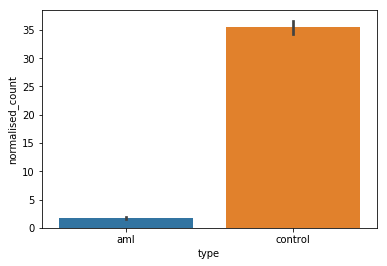

In [34]:
sns.barplot(x='type', y = 'normalised_count', data =df)

In [37]:
grouped.mean()

count    read_count  normalised_count
seq            type                                                
AB052567.1     aml         0.826000  3.295246e+07          0.026612
               control    11.258004  2.075124e+07          0.507424
AB052568.1     aml         1.170667  3.295246e+07          0.037752
               control    14.919951  2.059465e+07          0.675693
AB052569.1     aml         1.582000  3.295246e+07          0.051535
               control    18.496138  2.038710e+07          0.841436
AB052570.1     aml         0.688000  3.295246e+07          0.016225
               control     2.342986  2.067293e+07          0.107428
AB052571.1     aml         0.717333  3.295246e+07          0.023655
               control     8.913148  2.037873e+07          0.409150
AB052572.1     aml         0.512000  3.295246e+07          0.017636
               control     7.416312  2.043822e+07          0.345302
AB052573.1     aml         2.881333  3.295246e+07          0.074088
               control    14.084024  2.025838e+07          0.638855
AB052574.1     aml         0.183333  3.295246e+07          0.007721
               control     4.891619  2.052817e+07          0.223483
AB052575.1     aml         0.546000  3.295246e+07          0.018123
               control     9.086109  2.068334e+07          0.409567
AB052576.1     aml         1.102000  3.295246e+07          0.035823
               control    13.890056  2.062477e+07          0.628487
AB062072.1     aml         9.758667  3.295246e+07          0.317635
               control   141.232546  1.954327e+07          6.394061
AB062073.1     aml         1.284667  3.295246e+07          0.049859
               control    12.563365  1.970397e+07          0.624784
AB062074.1     aml        22.813333  3.295246e+07          0.727593
               control   245.348639  1.951777e+07         11.097354
AB062075.1     aml        13.429333  3.295246e+07          0.449470
               control   185.550454  1.951330e+07          8.526524
AB062076.1     aml         5.121333  3.295246e+07          0.158138
               control    45.826645  1.952639e+07          2.263357
...                             ...           ...               ...
XM_011513341.3 aml       158.448000  3.295246e+07          4.822733
               control  1127.087953  1.950996e+07         50.868834
XM_011528461.2 aml         3.478000  3.295246e+07          0.114554
               control    41.908578  1.991950e+07          1.853781
XM_011528468.3 aml         2.880000  3.295246e+07          0.094275
               control    44.915777  2.048728e+07          2.002672
XM_011528469.2 aml         1.696667  3.295246e+07          0.054743
               control    25.480815  2.052472e+07          1.129055
XM_011531085.2 aml         0.382667  3.295246e+07          0.013942
               control     6.398993  2.060704e+07          0.293753
XM_017007612.2 aml         3.198667  3.295246e+07          0.102984
               control    48.357100  2.043080e+07          2.147330
XM_017007613.2 aml         2.060000  3.295246e+07          0.065897
               control    32.204234  2.094115e+07          1.412610
XM_017007614.2 aml         3.285333  3.295246e+07          0.105261
               control    50.994069  2.043139e+07          2.265116
XM_017007620.2 aml         2.284000  3.295246e+07          0.083909
               control    21.860348  1.984865e+07          1.003511
XM_017012936.1 aml        18.955333  3.295246e+07          0.627650
               control   252.056614  1.967375e+07         11.277407
XM_017017016.1 aml         3.463333  3.295246e+07          0.111537
               control    56.699710  2.026594e+07          2.733213
XM_017027549.1 aml         0.814000  3.295246e+07          0.027449
               control     9.528634  2.074505e+07          0.424261
XM_024453864.1 aml         3.285333  3.295246e+07          0.105261
               control    50.994069  2.043139e+07          2.265116
XM_024453865.1 aml